In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

In [6]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [7]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [10]:
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

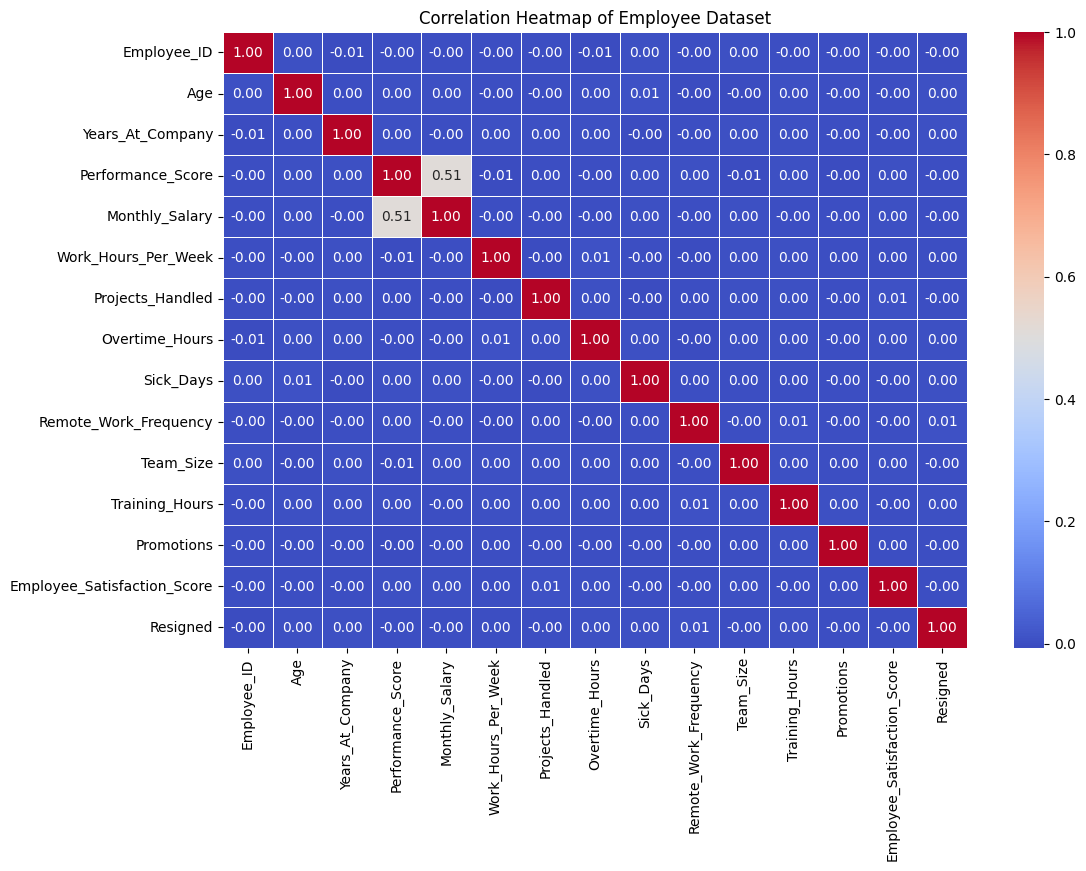

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'bool'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Employee Dataset')

plt.show()

In [14]:
# Check for null values
print("🔍 Null Values:")
display(df.isnull().sum())

# Check for duplicates
print("\n🔄 Duplicate Rows:", df.duplicated().sum())

# Convert Hire_Date to datetime
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')

# Recalculate Years_At_Company
current_year = pd.Timestamp.now().year
df['Years_At_Company_Calculated'] = current_year - df['Hire_Date'].dt.year

# Identify discrepancies between given and recalculated years
df['Years_Match'] = df['Years_At_Company'] == df['Years_At_Company_Calculated']

print("\n❗ Discrepancies in Years_At_Company:")
display(df[~df['Years_Match']][['Hire_Date', 'Years_At_Company', 'Years_At_Company_Calculated']])



🔍 Null Values:


Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
Years_At_Company_Calculated    0
Years_Match                    0
dtype: int64


🔄 Duplicate Rows: 0

❗ Discrepancies in Years_At_Company:


,Hire_Date,Years_At_Company,Years_At_Company_Calculated
0,2022-01-19 08:03:05.556036,2,3
1,2024-04-18 08:03:05.556036,0,1
2,2015-10-26 08:03:05.556036,8,10
3,2016-10-22 08:03:05.556036,7,9
4,2021-07-23 08:03:05.556036,3,4
...,...,...,...
99995,2022-12-07 08:03:05.556036,1,3
99996,2018-07-24 08:03:05.556036,6,7
99997,2015-11-24 08:03:05.556036,8,10
99998,2015-08-03 08:03:05.556036,9,10


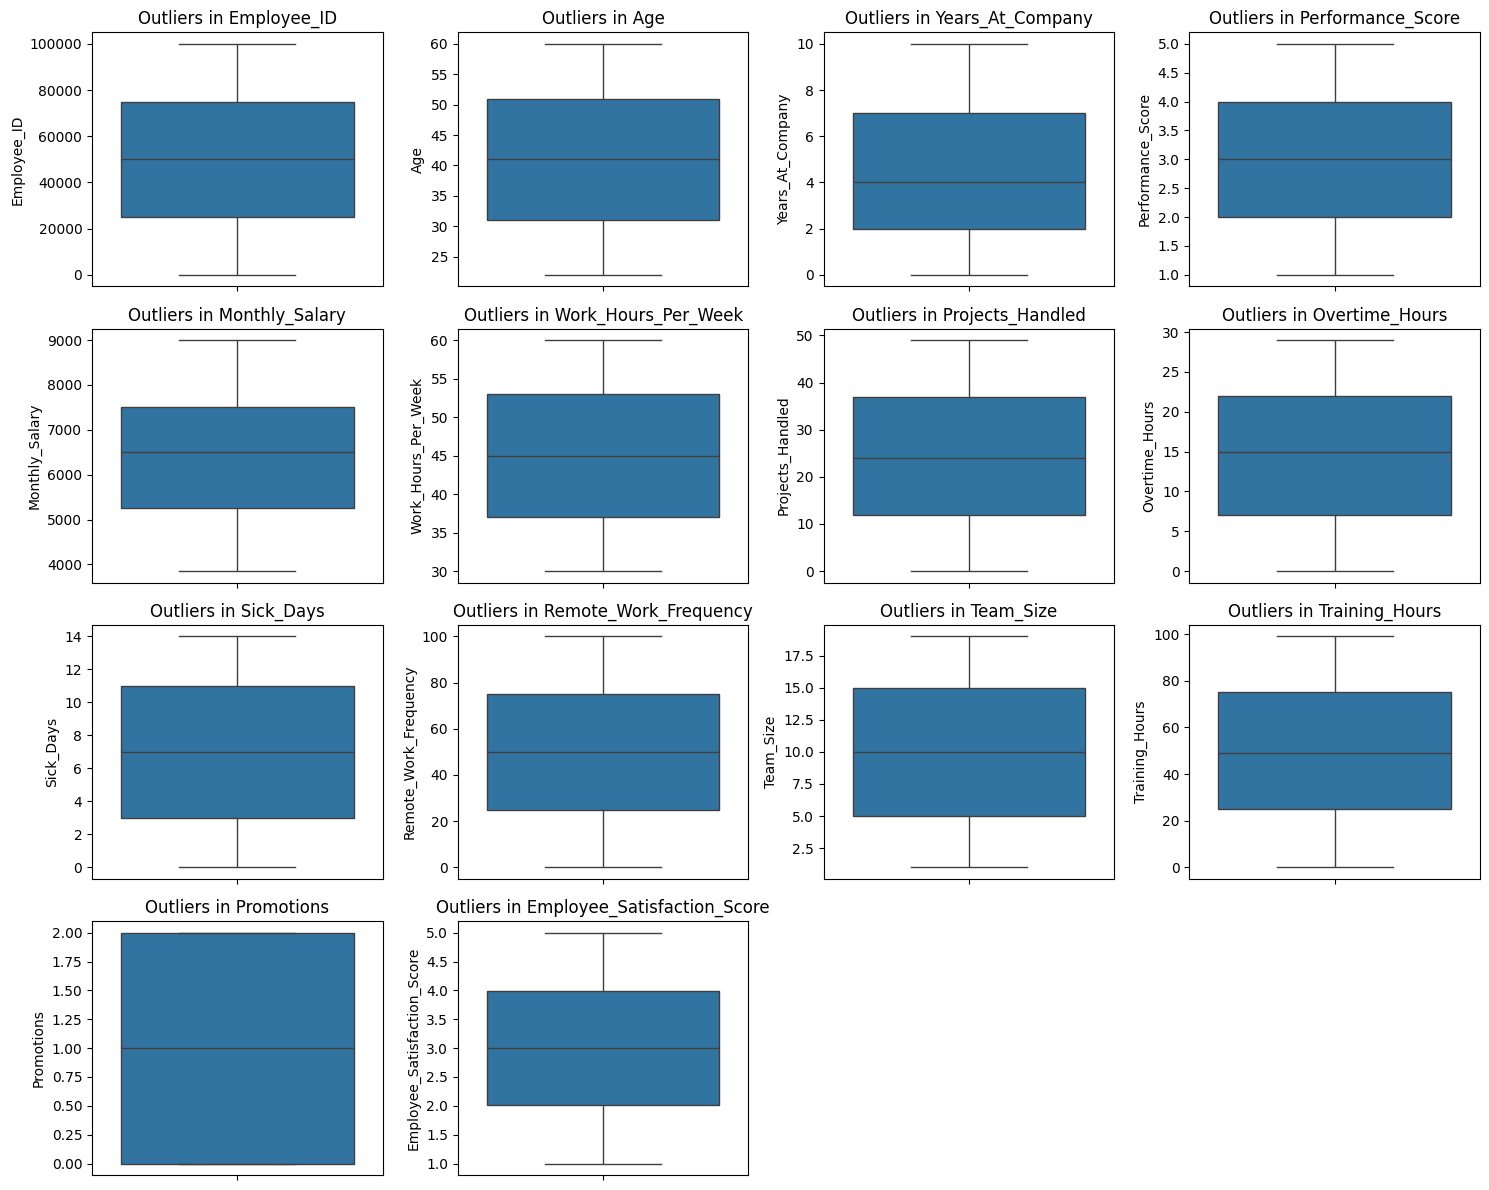

In [15]:
# Outlier detection using box plots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.tight_layout()

plt.show()

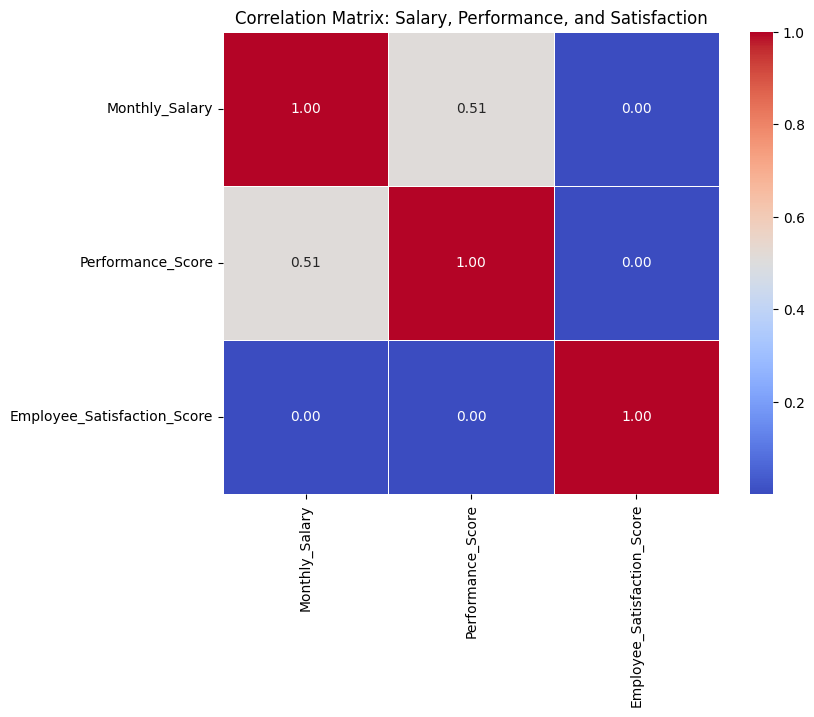

In [16]:
# Select relevant numeric columns
corr_cols = ['Monthly_Salary', 'Performance_Score', 'Employee_Satisfaction_Score']
corr_matrix = df[corr_cols].corr(method='pearson')

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Salary, Performance, and Satisfaction')
plt.show()


In [18]:
from scipy.stats import chi2_contingency

# Chi-square test: Resigned vs Monthly_Salary
job_title_ct = pd.crosstab(df['Monthly_Salary'], df['Resigned'])
chi2, p, dof, expected = chi2_contingency(job_title_ct)

print("Chi-Square Test: Resigned vs Monthly_Salary")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Check significance level (usually 0.05)
if p < 0.05:
    print("Result: Significant relationship between Monthly_Salary and Resignation.")
else:
    print("Result: No significant relationship between Monthly_Salary and Resignation.")


Chi-Square Test: Resigned vs Monthly_Salary
Chi2 Statistic: 16.470655164833175
P-value: 0.9433737058747477
Result: No significant relationship between Monthly_Salary and Resignation.


**we can see that we have some relationship between Monthly_Salary and resignation**

In [19]:
import statsmodels.api as sm

# Encode Education_Level as numeric (for regression)
df['Education_Level_Cat'] = pd.factorize(df['Education_Level'])[0]

# Define features (X) and target (y)
X = df[['Performance_Score', 'Education_Level_Cat', 'Years_At_Company']]
y = df['Monthly_Salary']

# Add constant term for intercept
X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X).fit()

# Summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Monthly_Salary   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:35:46   Log-Likelihood:            -8.4927e+05
No. Observations:              100000   AIC:                         1.699e+06
Df Residuals:                   99996   BIC:                         1.699e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4916.6779    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features (X) and target (y)
X = df[['Monthly_Salary', 'Performance_Score', 'Employee_Satisfaction_Score']]
y = df['Resigned'].astype(int)  # Ensure it's binary (0/1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and fit logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
